# Importando dados

In [ ]:
# LIBERAR ACESSO AO DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
AOI2007_dir = '/content/drive/MyDrive/GEOTEC/Alentejo/Flávio PosDoc/Caixa de Pandora do Flávio/'

# Filtragem do Dataframe

In [ ]:
import geopandas as gpd

alentejo = gpd.read_file(AOI2007_dir + 'DADOS USO DO SOLO_ANO/ALENTEJO/AOIS_2007/AOIS_2007.shp')
alentejo.COS07n4_L.unique() #aqui ele seleciona só os valores dessa coluna "...4_L"

array(['Culturas temporárias de sequeiro e regadio', 'Arrozais', 'Vinhas',
       'Pomares', 'Olivais',
       'Culturas temporárias e/ou pastagens melhoradas associadas a vinha',
       'Culturas temporárias e/ou pastagens melhoradas associadas a pomar',
       'Culturas temporárias e/ou pastagens melhoradas associadas a olival',
       'Agricultura protegida e viveiros', 'Pastagens melhoradas',
       'Pastagens espontâneas'], dtype=object)

In [ ]:
# MÁCARAS
mask_ct_de_sequeiro_e_regadio = alentejo.COS07n4_L.str.contains('Culturas temporárias de sequeiro e regadio', case=False)
mask_arrozais = alentejo.COS07n4_L.str.contains('Arrozais', case=False)
mask_vinhas = alentejo.COS07n4_L.str.contains('vinha', case=False)
mask_pomares = alentejo.COS07n4_L.str.contains('Pomares', case=False)
mask_olivais = alentejo.COS07n4_L.str.contains('Olivais', case=False)
mask_ctpma_a_vinha = alentejo.COS07n4_L.str.contains('Culturas temporárias e/ou pastagens melhoradas associadas a vinha', case=False)
mask_ctpma_a_pomar = alentejo.COS07n4_L.str.contains('Culturas temporárias e/ou pastagens melhoradas associadas a pomar', case=False)
mask_ctpma_a_olival = alentejo.COS07n4_L.str.contains('Culturas temporárias e/ou pastagens melhoradas associadas a olival', case=False)
mask_agricultura_protegida_e_viveiros = alentejo.COS07n4_L.str.contains('Agricultura protegida e viveiros', case=False)
mask_pastagens_melhoradas = alentejo.COS07n4_L.str.contains('Pastagens melhoradas', case=False)
mask_pastagens_espontâneas = alentejo.COS07n4_L.str.contains('Pastagens espontâneas', case=False)




# #Novos Geodataframes
ct_de_sequeiro_e_regadio_df = alentejo[mask_ct_de_sequeiro_e_regadio]
arrozais_df = alentejo[mask_arrozais]
vinhas_df = alentejo[mask_vinhas]
pomares_df = alentejo[mask_pomares]
olivais_df = alentejo[mask_olivais]
ctpma_a_vinha_df = alentejo[mask_ctpma_a_vinha]
ctpma_a_pomar_df = alentejo[mask_ctpma_a_pomar]
ctpma_a_olival_df = alentejo[mask_ctpma_a_olival]
agricultura_protegida_e_viveiros_df = alentejo[mask_agricultura_protegida_e_viveiros]
pastagens_melhoradas_df = alentejo[mask_pastagens_melhoradas]
pastagens_espontâneas_df = alentejo[mask_pastagens_espontâneas]


# Prints
print(f'Número de polígonos definidos como Culturas temporárias de sequeiro e regadio: {len(ct_de_sequeiro_e_regadio_df)}')
print(f'Número de polígonos definidos como arrozais: {len(arrozais_df)}')
print(f'Número de polígonos definidos como vinhas: {len(vinhas_df)}')
print(f'Número de polígonos definidos como pomares: {len(pomares_df)}')
print(f'Número de polígonos definidos como olivais: {len(olivais_df)}')
print(f'Número de polígonos definidos como Culturas temporárias e/ou pastagens melhoradas associadas a vinha: {len(ctpma_a_vinha_df)}')
print(f'Número de polígonos definidos como Culturas temporárias e/ou pastagens melhoradas associadas a pomar: {len(ctpma_a_pomar_df)}')
print(f'Número de polígonos definidos como Culturas temporárias e/ou pastagens melhoradas associadas a olival: {len(ctpma_a_olival_df)}')
print(f'Número de polígonos definidos como Agricultura protegida e viveiros: {len(agricultura_protegida_e_viveiros_df)}')
print(f'Número de polígonos definidos como pastagens melhoradas: {len(pastagens_melhoradas_df)}')
print(f'Número de polígonos definidos como pastagens espontâneas: {len(pastagens_espontâneas_df)}')



Número de polígonos definidos como Culturas temporárias de sequeiro e regadio: 7854
Número de polígonos definidos como arrozais: 222
Número de polígonos definidos como vinhas: 1704
Número de polígonos definidos como pomares: 763
Número de polígonos definidos como olivais: 9768
Número de polígonos definidos como Culturas temporárias e/ou pastagens melhoradas associadas a vinha: 20
Número de polígonos definidos como Culturas temporárias e/ou pastagens melhoradas associadas a pomar: 36
Número de polígonos definidos como Culturas temporárias e/ou pastagens melhoradas associadas a olival: 2477
Número de polígonos definidos como Agricultura protegida e viveiros: 43
Número de polígonos definidos como pastagens melhoradas: 18054
Número de polígonos definidos como pastagens espontâneas: 722


In [ ]:
# Pra que isso serve exatamente?
print(f'vinhas tipos: {vinhas_df.COS07n4_L.unique()}')
print(f'olivais tipos: {olivais_df.COS07n4_L.unique()}')

vinhas tipos: ['Vinhas'
 'Culturas temporárias e/ou pastagens melhoradas associadas a vinha']
olivais tipos: ['Olivais']


In [ ]:
# Exibir o sistema de referência
print(f"Sistema de referência: {alentejo.crs}")

# Calcular a área total em hectares para cada tipo de uso do solo
total_area_ct_de_sequeiro_e_regadio = ct_de_sequeiro_e_regadio_df["Area_ha"].sum()
total_area_arrozais = arrozais_df["Area_ha"].sum()
total_area_vinhas = vinhas_df["Area_ha"].sum()
total_area_pomares = pomares_df["Area_ha"].sum()
total_area_olivais = olivais_df["Area_ha"].sum()
total_area_ctpma_a_vinha = ctpma_a_vinha_df["Area_ha"].sum()
total_area_ctpma_a_pomar = ctpma_a_pomar_df["Area_ha"].sum()
total_area_ctpma_a_olival = ctpma_a_olival_df["Area_ha"].sum()
total_area_agricultura_protegida_e_viveiros = agricultura_protegida_e_viveiros_df["Area_ha"].sum()
total_area_pastagens_melhoradas = pastagens_melhoradas_df["Area_ha"].sum()
total_area_pastagens_espontaneas = pastagens_espontâneas_df["Area_ha"].sum()

# Exibir as áreas calculadas
print(f"Área total de culturas temporárias de sequeiro e regadio: {total_area_ct_de_sequeiro_e_regadio:.2f} hectares")
print(f"Área total de arrozais: {total_area_arrozais:.2f} hectares")
print(f"Área total de vinhas: {total_area_vinhas:.2f} hectares")
print(f"Área total de pomares: {total_area_pomares:.2f} hectares")
print(f"Área total de olivais: {total_area_olivais:.2f} hectares")
print(f"Área total de culturas temporárias e/ou pastagens melhoradas associadas a vinha: {total_area_ctpma_a_vinha:.2f} hectares")
print(f"Área total de culturas temporárias e/ou pastagens melhoradas associadas a pomar: {total_area_ctpma_a_pomar:.2f} hectares")
print(f"Área total de culturas temporárias e/ou pastagens melhoradas associadas a olival: {total_area_ctpma_a_olival:.2f} hectares")
print(f"Área total de agricultura protegida e viveiros: {total_area_agricultura_protegida_e_viveiros:.2f} hectares")
print(f"Área total de pastagens melhoradas: {total_area_pastagens_melhoradas:.2f} hectares")
print(f"Área total de pastagens espontâneas: {total_area_pastagens_espontaneas:.2f} hectares")


Sistema de referência: EPSG:3763
Área total de culturas temporárias de sequeiro e regadio: 470830.80 hectares
Área total de arrozais: 11392.34 hectares
Área total de vinhas: 25579.23 hectares
Área total de pomares: 4834.75 hectares
Área total de olivais: 175734.27 hectares
Área total de culturas temporárias e/ou pastagens melhoradas associadas a vinha: 56.04 hectares
Área total de culturas temporárias e/ou pastagens melhoradas associadas a pomar: 123.24 hectares
Área total de culturas temporárias e/ou pastagens melhoradas associadas a olival: 11138.76 hectares
Área total de agricultura protegida e viveiros: 448.63 hectares
Área total de pastagens melhoradas: 392016.82 hectares
Área total de pastagens espontâneas: 4856.73 hectares


In [ ]:
pomares_df

,ID,COS07n1_C,COS07n1_L,COS07n2_C,COS07n2_L,COS07n3_C,COS07n3_L,COS07n4_C,COS07n4_L,Area_ha,geometry
9760,175207,2,Agricultura,2.2,Culturas permanentes,2.2.2,Pomares,2.2.2.1,Pomares,2.517744,"POLYGON ((24018.483 -246688.895, 24028.869 -24..."
9761,175221,2,Agricultura,2.2,Culturas permanentes,2.2.2,Pomares,2.2.2.1,Pomares,1.681664,"POLYGON ((25480.652 -245836.363, 25482.66 -245..."
9762,175222,2,Agricultura,2.2,Culturas permanentes,2.2.2,Pomares,2.2.2.1,Pomares,10.689794,"POLYGON ((26304.971 -245710.438, 26313.619 -24..."
9763,175223,2,Agricultura,2.2,Culturas permanentes,2.2.2,Pomares,2.2.2.1,Pomares,4.981903,"POLYGON ((25670.237 -245497.371, 25714.471 -24..."
9764,175227,2,Agricultura,2.2,Culturas permanentes,2.2.2,Pomares,2.2.2.1,Pomares,1.125922,"POLYGON ((27700.474 -245125.64, 27756.515 -245..."
...,...,...,...,...,...,...,...,...,...,...,...
10518,178912,2,Agricultura,2.2,Culturas permanentes,2.2.2,Pomares,2.2.2.1,Pomares,2.285292,"POLYGON ((43949.99 -28748.27, 44004.17 -28759...."
10519,178995,2,Agricultura,2.2,Culturas permanentes,2.2.2,Pomares,2.2.2.1,Pomares,2.939400,"POLYGON ((56596.44 -27174.26, 56582.134 -27196..."
10520,179000,2,Agricultura,2.2,Culturas permanentes,2.2.2,Pomares,2.2.2.1,Pomares,2.087832,"POLYGON ((29064.898 -27293.395, 29043.03 -2729..."
10521,179365,2,Agricultura,2.2,Culturas permanentes,2.2.2,Pomares,2.2.2.1,Pomares,3.465794,"POLYGON ((57124.73 -20662.05, 57160.84 -20663...."


# Rioxarray

In [ ]:
%%capture
!pip install rioxarray
import rioxarray as rxr
import os
import matplotlib.pyplot as plt

Dimensões: ('band', 'y', 'x')
Sistema de Coordenadas de Referência (CRS): EPSG:3857
Ocorreu um erro ao carregar ou plotar o raster: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).


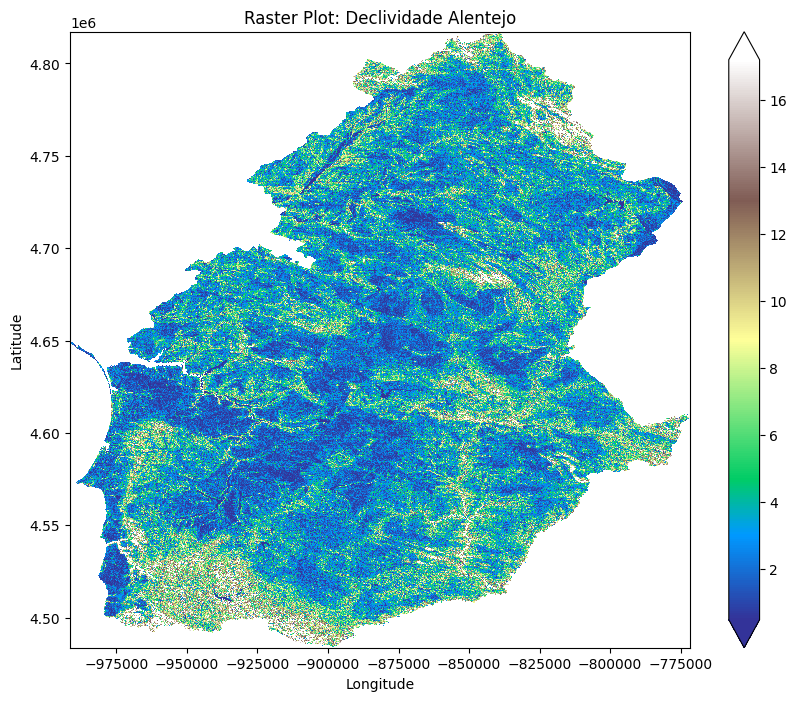

In [ ]:
# Definir o diretório base e o caminho relativo do arquivo
tif_file = os.path.join(AOI2007_dir, "SRTM Portugal/Raster para uso/Alentejo_decli_repr.tif")

# Carregar o arquivo GeoTIFF com rioxarray
try:
    raster = rxr.open_rasterio(tif_file, masked=True)

    # Exibir informações básicas
    print("Dimensões:", raster.dims)
    print("Sistema de Coordenadas de Referência (CRS):", raster.rio.crs)

    # Plotar o raster
    plt.figure(figsize=(10, 8))
    raster.plot(
        cmap="terrain",  # Escolha o esquema de cores adequado (ex.: terrain, hot)
        robust=True  # Ignorar valores extremos para melhorar o contraste
    )
    plt.title("Raster Plot: Declividade Alentejo")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.colorbar(label="Valor do Raster")
    plt.show()
except FileNotFoundError:
    print(f"Arquivo não encontrado: {tif_file}")
except Exception as e:
    print(f"Ocorreu um erro ao carregar ou plotar o raster: {e}")



Verificando bandas e infos do Raster

In [ ]:
import rasterio

# Caminho para o arquivo raster
raster_path = tif_file

# Abrir o arquivo raster e acessar os metadados
with rasterio.open(raster_path) as src:
    print(src.meta)  # Exibe os metadados principais
    print(src.tags())  # Exibe tags adicionais


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 2126, 'height': 3225, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'), 'transform': Affine(103.39635616180618, 0.0, -991461.2879,
       0.0, -103.39635615503863, 4817188.073)}
{'AREA_OR_POINT': 'Area'}


In [ ]:
import numpy as np
import rioxarray as rxr

# Carregar o raster
raster = rxr.open_rasterio(raster_path, masked=True).sel(band=1)

# Exibir valores mínimos e máximos
print("Valor mínimo:", raster.min().values)
print("Valor máximo:", raster.max().values)


Valor mínimo: 0.0
Valor máximo: 62.10446548461914


In [ ]:
print("Dimensões:", raster.dims)
print("Bandas disponíveis:", raster.coords['band'].values) #Como é o SRTM, retorna apenas [1] banda disponível

Dimensões: ('y', 'x')
Bandas disponíveis: 1


# Raster Stats

In [ ]:
%%capture
!pip install rasterstats

In [ ]:
import rioxarray as rxr
import geopandas as gpd
from rasterstats import zonal_stats

In [ ]:
# Carregar o raster e o GeoDataFrame
raster = rxr.open_rasterio(tif_file, masked=True).sel(band=1)  # Seleciona a banda 1/ Tif_file é o arquivo selecionado no "Definir o diretório base"

# Verificar e compatibilizar os CRS
if raster.rio.crs != alentejo.crs:
    print(f"Reprojetando raster de {raster.rio.crs} para {alentejo.crs}") #Ver qu
    raster = raster.rio.reproject(alentejo.crs)

# Garantir que o raster é 2D (x, y)
raster_2d = raster.squeeze()

Reprojetando raster de EPSG:3857 para EPSG:3763


## Análise Zonal das 11 feições

In [ ]:
# Calcular as estatísticas zonais (média e desvio padrão) para cada GeoDataFrame
stats_ct_de_sequeiro_e_regadio = zonal_stats(
    ct_de_sequeiro_e_regadio_df,
    raster_2d.values,
    affine=raster_2d.rio.transform(),
    stats=["mean", "std"],
    nodata=raster.rio.nodata
)

stats_arrozais = zonal_stats(
    arrozais_df,
    raster_2d.values,
    affine=raster_2d.rio.transform(),
    stats=["mean", "std"],
    nodata=raster.rio.nodata
)

stats_vinhas = zonal_stats(
    vinhas_df,
    raster_2d.values,
    affine=raster_2d.rio.transform(),
    stats=["mean", "std"],
    nodata=raster.rio.nodata
)

stats_pomares = zonal_stats(
    pomares_df,
    raster_2d.values,
    affine=raster_2d.rio.transform(),
    stats=["mean", "std"],
    nodata=raster.rio.nodata
)

stats_olivais = zonal_stats(
    olivais_df,
    raster_2d.values,
    affine=raster_2d.rio.transform(),
    stats=["mean", "std"],
    nodata=raster.rio.nodata
)

stats_ctpma_a_vinha = zonal_stats(
    ctpma_a_vinha_df,
    raster_2d.values,
    affine=raster_2d.rio.transform(),
    stats=["mean", "std"],
    nodata=raster.rio.nodata
)

stats_ctpma_a_pomar = zonal_stats(
    ctpma_a_pomar_df,
    raster_2d.values,
    affine=raster_2d.rio.transform(),
    stats=["mean", "std"],
    nodata=raster.rio.nodata
)

stats_ctpma_a_olival = zonal_stats(
    ctpma_a_olival_df,
    raster_2d.values,
    affine=raster_2d.rio.transform(),
    stats=["mean", "std"],
    nodata=raster.rio.nodata
)

stats_agricultura_protegida_e_viveiros = zonal_stats(
    agricultura_protegida_e_viveiros_df,
    raster_2d.values,
    affine=raster_2d.rio.transform(),
    stats=["mean", "std"],
    nodata=raster.rio.nodata
)

stats_pastagens_melhoradas = zonal_stats(
    pastagens_melhoradas_df,
    raster_2d.values,
    affine=raster_2d.rio.transform(),
    stats=["mean", "std"],
    nodata=raster.rio.nodata
)

stats_pastagens_espontaneas = zonal_stats( #O geodataframe de pastagaens espontâneas tem o acento "^", enquanto o "stats" não tem!!!
    pastagens_espontâneas_df,
    raster_2d.values,
    affine=raster_2d.rio.transform(),
    stats=["mean", "std"],
    nodata=raster.rio.nodata
)


## Incluindo Análise Zonal nos Geodataframes

In [ ]:
# Adicionar os resultados ao GeoDataFrame ct_de_sequeiro_e_regadio_df
ct_de_sequeiro_e_regadio_df.loc[:, "declividade_mean"] = [float(stat["mean"]) if stat["mean"] is not None else None for stat in stats_ct_de_sequeiro_e_regadio]
ct_de_sequeiro_e_regadio_df.loc[:, "declividade_std"] = [float(stat["std"]) if stat["std"] is not None else None for stat in stats_ct_de_sequeiro_e_regadio]

# Adicionar os resultados ao GeoDataFrame arrozais_df
arrozais_df.loc[:, "declividade_mean"] = [float(stat["mean"]) if stat["mean"] is not None else None for stat in stats_arrozais]
arrozais_df.loc[:, "declividade_std"] = [float(stat["std"]) if stat["std"] is not None else None for stat in stats_arrozais]

# Adicionar os resultados ao GeoDataFrame vinhas_df
vinhas_df.loc[:, "declividade_mean"] = [float(stat["mean"]) if stat["mean"] is not None else None for stat in stats_vinhas]
vinhas_df.loc[:, "declividade_std"] = [float(stat["std"]) if stat["std"] is not None else None for stat in stats_vinhas]

# Adicionar os resultados ao GeoDataFrame pomares_df
pomares_df.loc[:, "declividade_mean"] = [float(stat["mean"]) if stat["mean"] is not None else None for stat in stats_pomares]
pomares_df.loc[:, "declividade_std"] = [float(stat["std"]) if stat["std"] is not None else None for stat in stats_pomares]

# Adicionar os resultados ao GeoDataFrame olivais_df
olivais_df.loc[:, "declividade_mean"] = [float(stat["mean"]) if stat["mean"] is not None else None for stat in stats_olivais]
olivais_df.loc[:, "declividade_std"] = [float(stat["std"]) if stat["std"] is not None else None for stat in stats_olivais]

# Adicionar os resultados ao GeoDataFrame ctpma_a_vinha_df
ctpma_a_vinha_df.loc[:, "declividade_mean"] = [float(stat["mean"]) if stat["mean"] is not None else None for stat in stats_ctpma_a_vinha]
ctpma_a_vinha_df.loc[:, "declividade_std"] = [float(stat["std"]) if stat["std"] is not None else None for stat in stats_ctpma_a_vinha]

# Adicionar os resultados ao GeoDataFrame ctpma_a_pomar_df
ctpma_a_pomar_df.loc[:, "declividade_mean"] = [float(stat["mean"]) if stat["mean"] is not None else None for stat in stats_ctpma_a_pomar]
ctpma_a_pomar_df.loc[:, "declividade_std"] = [float(stat["std"]) if stat["std"] is not None else None for stat in stats_ctpma_a_pomar]

# Adicionar os resultados ao GeoDataFrame ctpma_a_olival_df
ctpma_a_olival_df.loc[:, "declividade_mean"] = [float(stat["mean"]) if stat["mean"] is not None else None for stat in stats_ctpma_a_olival]
ctpma_a_olival_df.loc[:, "declividade_std"] = [float(stat["std"]) if stat["std"] is not None else None for stat in stats_ctpma_a_olival]

# Adicionar os resultados ao GeoDataFrame agricultura_protegida_e_viveiros_df
agricultura_protegida_e_viveiros_df.loc[:, "declividade_mean"] = [float(stat["mean"]) if stat["mean"] is not None else None for stat in stats_agricultura_protegida_e_viveiros]
agricultura_protegida_e_viveiros_df.loc[:, "declividade_std"] = [float(stat["std"]) if stat["std"] is not None else None for stat in stats_agricultura_protegida_e_viveiros]

# Adicionar os resultados ao GeoDataFrame pastagens_melhoradas_df
pastagens_melhoradas_df.loc[:, "declividade_mean"] = [float(stat["mean"]) if stat["mean"] is not None else None for stat in stats_pastagens_melhoradas]
pastagens_melhoradas_df.loc[:, "declividade_std"] = [float(stat["std"]) if stat["std"] is not None else None for stat in stats_pastagens_melhoradas]

# Adicionar os resultados ao GeoDataFrame pastagens_espontâneas_df
pastagens_espontâneas_df.loc[:, "declividade_mean"] = [float(stat["mean"]) if stat["mean"] is not None else None for stat in stats_pastagens_espontaneas]
pastagens_espontâneas_df.loc[:, "declividade_std"] = [float(stat["std"]) if stat["std"] is not None else None for stat in stats_pastagens_espontaneas]


/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/usr/local/lib/python3.11/dist-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

## Exibindo o DF

In [ ]:
arrozais_df[['Area_ha','declividade_mean','declividade_std']].astype(float).describe()

,Area_ha,declividade_mean,declividade_std
count,222.000000,210.000000,210.000000
mean,51.316827,2.449572,1.533800
std,92.737345,1.594926,1.053004
min,1.093394,0.412758,0.000000
25%,7.608729,1.380391,0.808053
50%,18.897229,2.101700,1.316689
75%,48.156747,3.018507,1.997647
max,604.288632,11.204458,6.024785


# Histograma

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

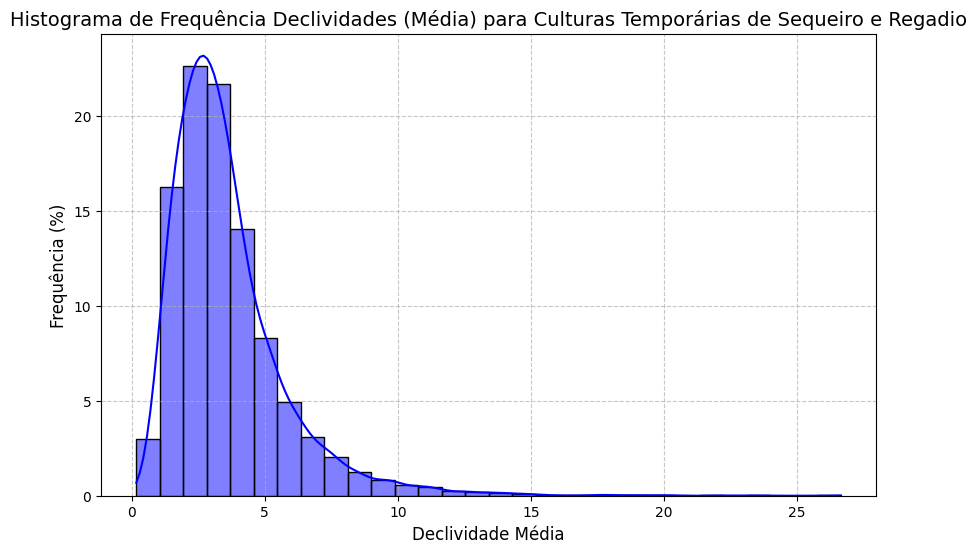

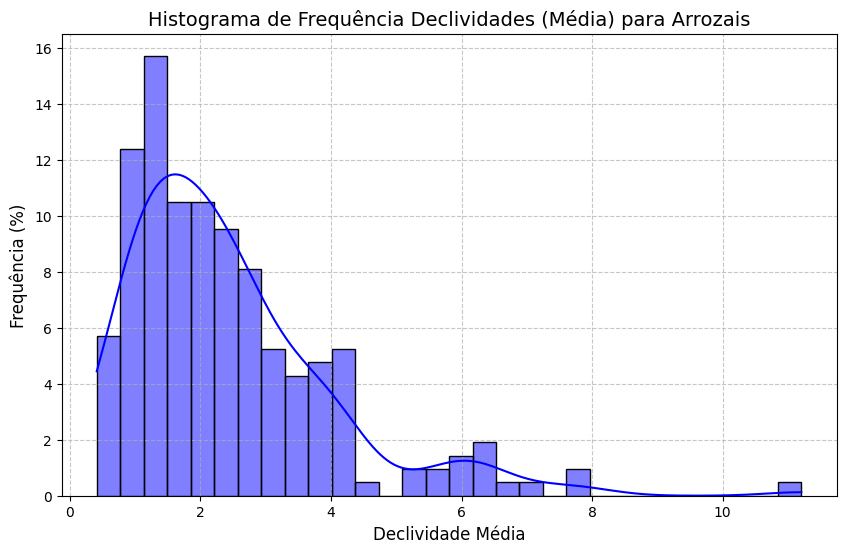

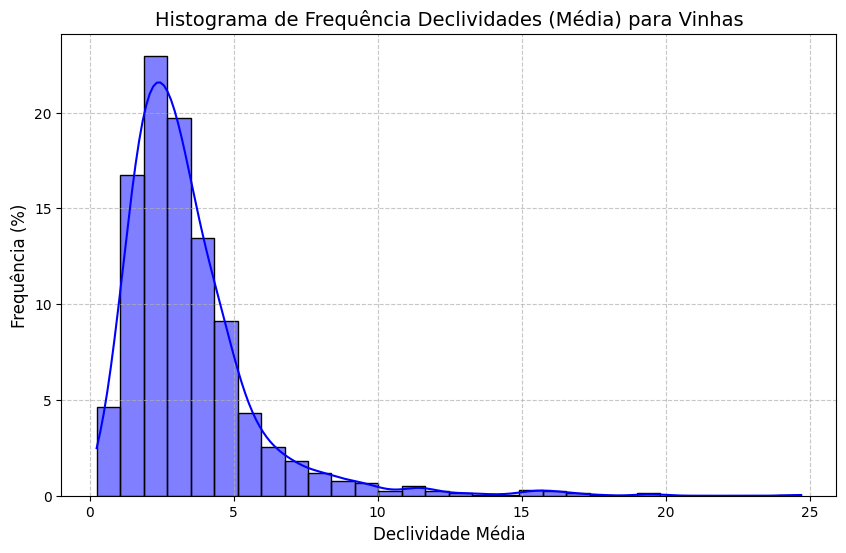

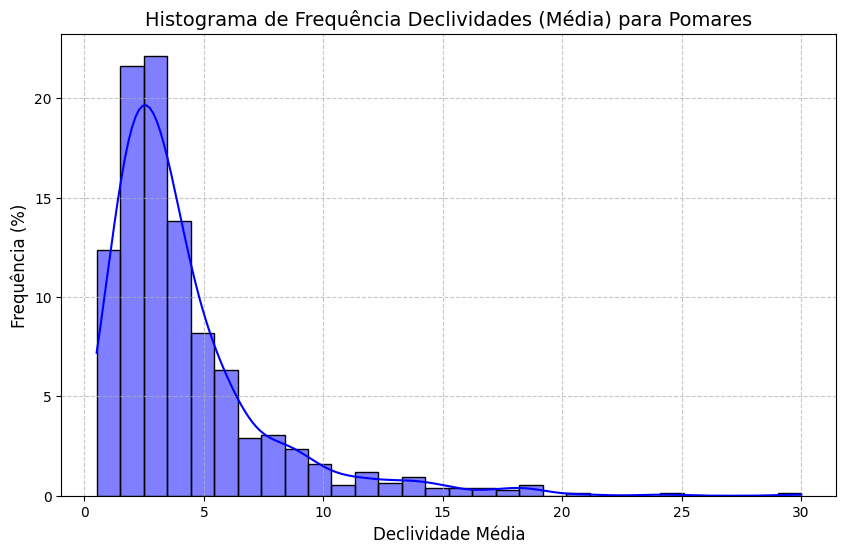

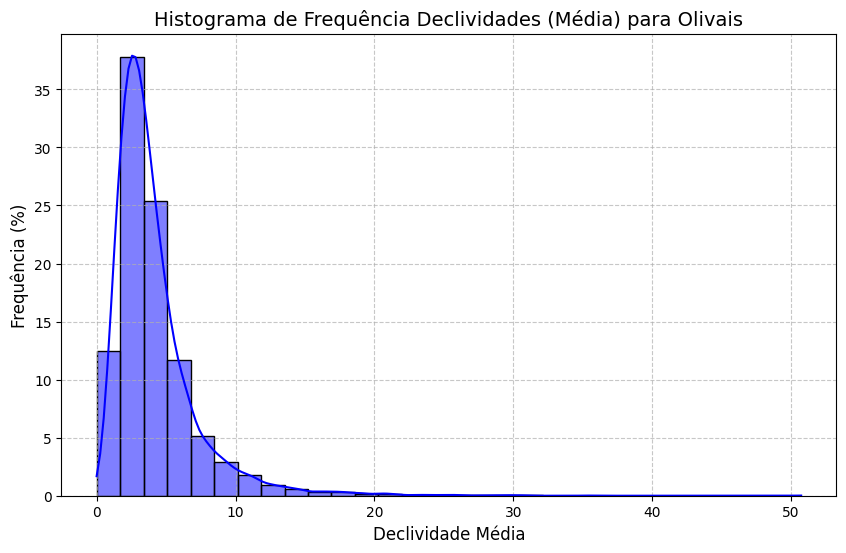

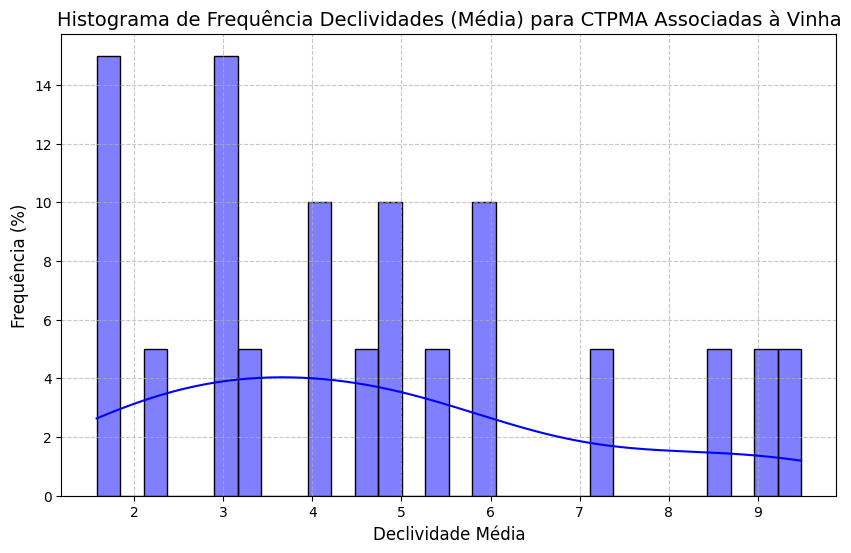

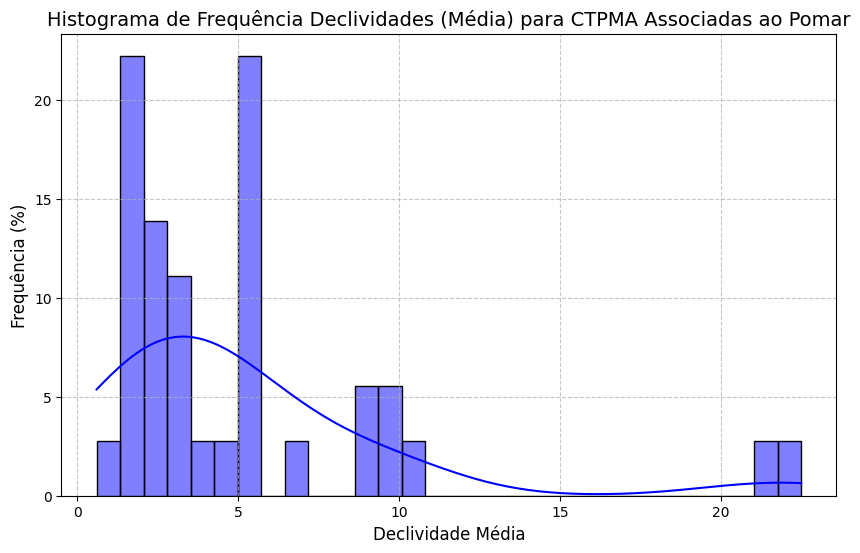

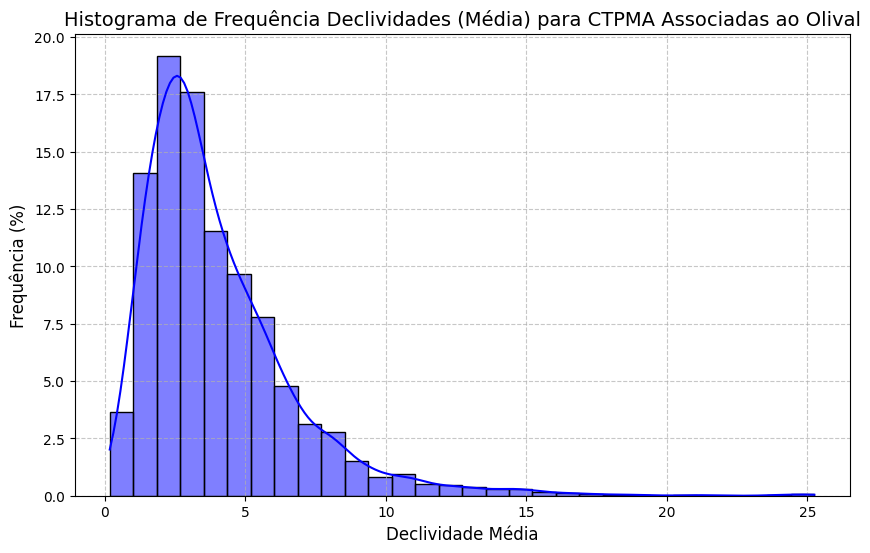

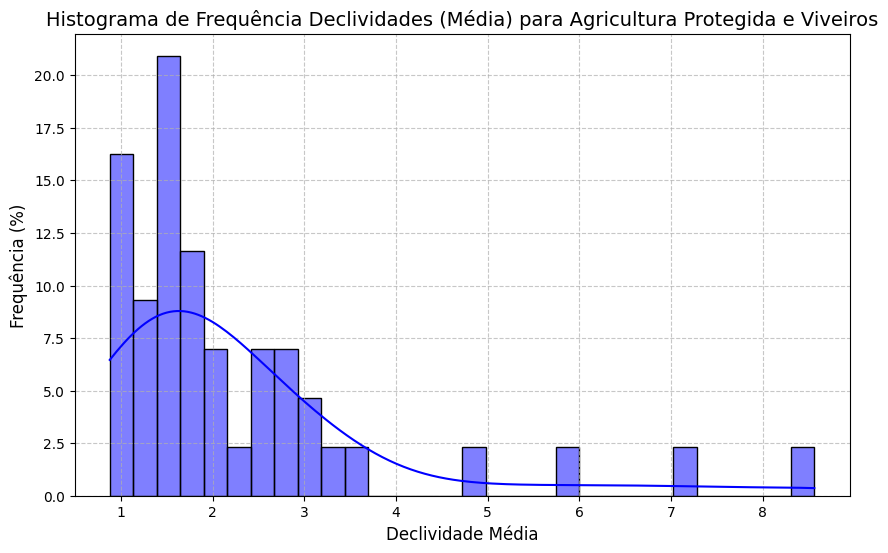

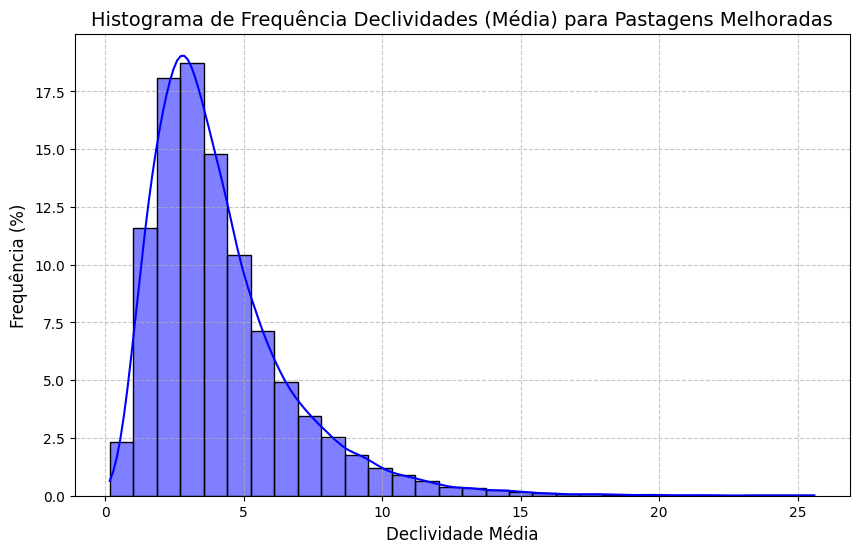

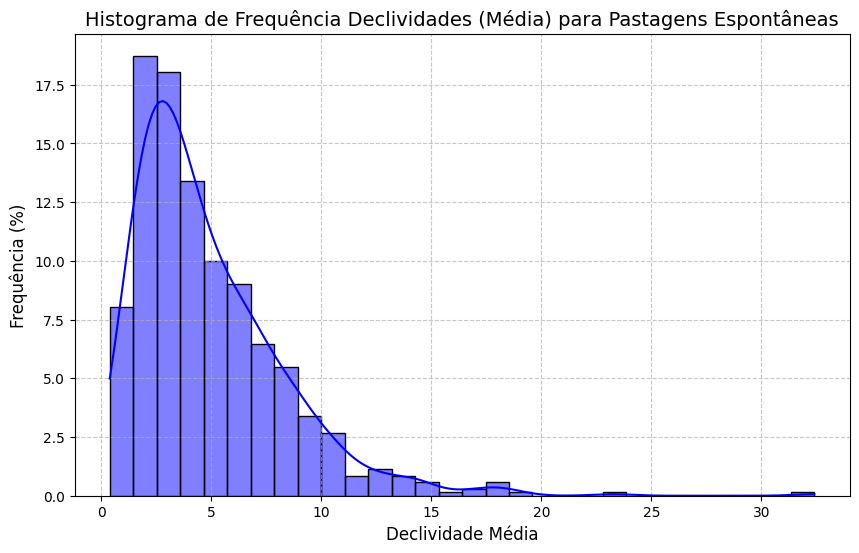

In [ ]:
# Histograma para Culturas Temporárias de Sequeiro e Regadio
if "declividade_mean" in ct_de_sequeiro_e_regadio_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        ct_de_sequeiro_e_regadio_df["declividade_mean"].dropna(),
        bins=30,
        kde=True,
        color="blue",
        stat="percent"
    )
    plt.title("Histograma de Frequência Declividades (Média) para Culturas Temporárias de Sequeiro e Regadio", fontsize=14)
    plt.xlabel("Declividade Média", fontsize=12)
    plt.ylabel("Frequência (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
else:
    print("A coluna 'declividade_mean' não está presente no GeoDataFrame.")

# Histograma para Arrozais
if "declividade_mean" in arrozais_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        arrozais_df["declividade_mean"].dropna(),
        bins=30,
        kde=True,
        color="blue",
        stat="percent"
    )
    plt.title("Histograma de Frequência Declividades (Média) para Arrozais", fontsize=14)
    plt.xlabel("Declividade Média", fontsize=12)
    plt.ylabel("Frequência (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
else:
    print("A coluna 'declividade_mean' não está presente no GeoDataFrame.")

# Histograma para Vinhas
if "declividade_mean" in vinhas_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        vinhas_df["declividade_mean"].dropna(),
        bins=30,
        kde=True,
        color="blue",
        stat="percent"
    )
    plt.title("Histograma de Frequência Declividades (Média) para Vinhas", fontsize=14)
    plt.xlabel("Declividade Média", fontsize=12)
    plt.ylabel("Frequência (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
else:
    print("A coluna 'declividade_mean' não está presente no GeoDataFrame.")

# Histograma para Pomares
if "declividade_mean" in pomares_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        pomares_df["declividade_mean"].dropna(),
        bins=30,
        kde=True,
        color="blue",
        stat="percent"
    )
    plt.title("Histograma de Frequência Declividades (Média) para Pomares", fontsize=14)
    plt.xlabel("Declividade Média", fontsize=12)
    plt.ylabel("Frequência (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
else:
    print("A coluna 'declividade_mean' não está presente no GeoDataFrame.")

# Histograma para Olivais
if "declividade_mean" in olivais_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        olivais_df["declividade_mean"].dropna(),
        bins=30,
        kde=True,
        color="blue",
        stat="percent"
    )
    plt.title("Histograma de Frequência Declividades (Média) para Olivais", fontsize=14)
    plt.xlabel("Declividade Média", fontsize=12)
    plt.ylabel("Frequência (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
else:
    print("A coluna 'declividade_mean' não está presente no GeoDataFrame.")

# Histograma para Culturas Temporárias e/ou Pastagens Melhoradas Associadas à Vinha
if "declividade_mean" in ctpma_a_vinha_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        ctpma_a_vinha_df["declividade_mean"].dropna(),
        bins=30,
        kde=True,
        color="blue",
        stat="percent"
    )
    plt.title("Histograma de Frequência Declividades (Média) para CTPMA Associadas à Vinha", fontsize=14)
    plt.xlabel("Declividade Média", fontsize=12)
    plt.ylabel("Frequência (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
else:
    print("A coluna 'declividade_mean' não está presente no GeoDataFrame.")

# Histograma para Culturas Temporárias e/ou Pastagens Melhoradas Associadas ao Pomar
if "declividade_mean" in ctpma_a_pomar_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        ctpma_a_pomar_df["declividade_mean"].dropna(),
        bins=30,
        kde=True,
        color="blue",
        stat="percent"
    )
    plt.title("Histograma de Frequência Declividades (Média) para CTPMA Associadas ao Pomar", fontsize=14)
    plt.xlabel("Declividade Média", fontsize=12)
    plt.ylabel("Frequência (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
else:
    print("A coluna 'declividade_mean' não está presente no GeoDataFrame.")

# Histograma para Culturas Temporárias e/ou Pastagens Melhoradas Associadas ao Olival
if "declividade_mean" in ctpma_a_olival_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        ctpma_a_olival_df["declividade_mean"].dropna(),
        bins=30,
        kde=True,
        color="blue",
        stat="percent"
    )
    plt.title("Histograma de Frequência Declividades (Média) para CTPMA Associadas ao Olival", fontsize=14)
    plt.xlabel("Declividade Média", fontsize=12)
    plt.ylabel("Frequência (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
else:
    print("A coluna 'declividade_mean' não está presente no GeoDataFrame.")

# Histograma para Agricultura Protegida e Viveiros
if "declividade_mean" in agricultura_protegida_e_viveiros_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        agricultura_protegida_e_viveiros_df["declividade_mean"].dropna(),
        bins=30,
        kde=True,
        color="blue",
        stat="percent"
    )
    plt.title("Histograma de Frequência Declividades (Média) para Agricultura Protegida e Viveiros", fontsize=14)
    plt.xlabel("Declividade Média", fontsize=12)
    plt.ylabel("Frequência (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
else:
    print("A coluna 'declividade_mean' não está presente no GeoDataFrame.")

# Histograma para Pastagens Melhoradas
if "declividade_mean" in pastagens_melhoradas_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        pastagens_melhoradas_df["declividade_mean"].dropna(),
        bins=30,
        kde=True,
        color="blue",
        stat="percent"
    )
    plt.title("Histograma de Frequência Declividades (Média) para Pastagens Melhoradas", fontsize=14)
    plt.xlabel("Declividade Média", fontsize=12)
    plt.ylabel("Frequência (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
else:
    print("A coluna 'declividade_mean' não está presente no GeoDataFrame.")

# Histograma para Pastagens Espontâneas
if "declividade_mean" in pastagens_espontâneas_df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(
        pastagens_espontâneas_df["declividade_mean"].dropna(),
        bins=30,
        kde=True,
        color="blue",
        stat="percent"
    )
    plt.title("Histograma de Frequência Declividades (Média) para Pastagens Espontâneas", fontsize=14)
    plt.xlabel("Declividade Média", fontsize=12)
    plt.ylabel("Frequência (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
else:
    print("A coluna 'declividade_mean' não está presente no GeoDataFrame.")


ValueError: cannot reindex on an axis with duplicate labels

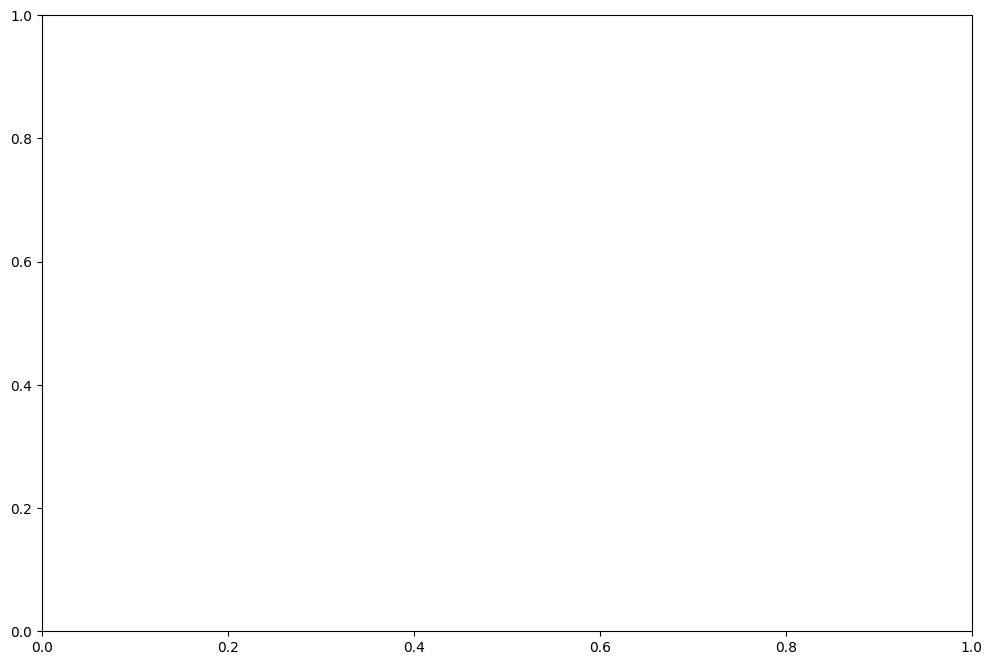

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Verificar se as colunas declividade_mean existem nos GeoDataFrames
if (
    "declividade_mean" in vinhas_df.columns and
    "declividade_mean" in olivais_df.columns and
    "declividade_mean" in pomares_df.columns and
    "declividade_mean" in arrozais_df.columns and
    "declividade_mean" in agricultura_protegida_e_viveiros_df.columns and
    "declividade_mean" in ct_de_sequeiro_e_regadio_df.columns and
    "declividade_mean" in pastagens_melhoradas_df.columns and
    "declividade_mean" in pastagens_espontâneas_df.columns and
    "declividade_mean" in ctpma_a_vinha_df.columns and
    "declividade_mean" in ctpma_a_pomar_df.columns and
    "declividade_mean" in ctpma_a_olival_df.columns
):

    # Criar um DataFrame combinado para facilitar o uso no Seaborn
    combined_df = pd.concat([
        vinhas_df[["declividade_mean"]].assign(Tipo="Vinhas"),
        olivais_df[["declividade_mean"]].assign(Tipo="Olivais"),
        pomares_df[["declividade_mean"]].assign(Tipo="Pomares"),
        arrozais_df[["declividade_mean"]].assign(Tipo="Arrozais"),
        agricultura_protegida_e_viveiros_df[["declividade_mean"]].assign(Tipo="Agricultura Protegida e Viveiros"),
        ct_de_sequeiro_e_regadio_df[["declividade_mean"]].assign(Tipo="Culturas de Sequeiro e Regadio"),
        pastagens_melhoradas_df[["declividade_mean"]].assign(Tipo="Pastagens Melhoradas"), #ESTA DANDO ERRO!!!
        pastagens_espontâneas_df[["declividade_mean"]].assign(Tipo="Pastagens Espontaneas"),
        ctpma_a_vinha_df[["declividade_mean"]].assign(Tipo="Culturas Temporarias e/ou Pastagens (Vinha)"), #ESTA DANDO ERRO!!!
        ctpma_a_pomar_df[["declividade_mean"]].assign(Tipo="Culturas Temporarias e/ou Pastagens (Pomar)"),
        ctpma_a_olival_df[["declividade_mean"]].assign(Tipo="Culturas Temporarias e/ou Pastagens (Olival)")
    ])

    # Criar o histograma de frequência em percentual
    plt.figure(figsize=(12, 8))
    plot = sns.histplot(
        data=combined_df,
        x="declividade_mean",
        hue="Tipo",  # Diferenciar por tipo
        bins=30,  # Número de bins
        kde=True,  # Adiciona a curva de densidade
        stat="percent",  # Frequência em percentual
        common_norm=False,  # Normalizar separadamente por grupo
        palette = {
    "Vinhas": "blue",
    "Olivais": "green",
    "Pomares": "orange",
    "Arrozais": "red",
    "Agricultura Protegida e Viveiros": "purple",
    "Culturas de Sequeiro e Regadio": "brown",
    "Pastagens Melhoradas": "pink",
    "Pastagens Espontaneas": "cyan",
    "Culturas Temporarias e/ou Pastagens (Vinha)": "yellow",
    "Culturas Temporarias e/ou Pastagens (Pomar)": "gray",
    "Culturas Temporarias e/ou Pastagens (Olival)": "olive"
}  # Cores diferentes
    )
    plt.title("Comparação de Declividades Médias: Todas Feições", fontsize=16)
    plt.xlabel("Declividade Média", fontsize=14)
    plt.ylabel("Frequência (%)", fontsize=14)

    # Garantir que a legenda é exibida
    handles, labels = plot.get_legend_handles_labels()
    plt.legend(handles, labels, title="Tipo de Cultivo", fontsize=12)

    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()
else:
    print("Uma ou ambas as colunas 'declividade_mean' estão ausentes nos GeoDataFrames.")


## Verificando erro

In [ ]:
# Lista dos GeoDataFrames a verificar, incluindo os comentados no código original
geo_dfs = {
    "Vinhas": vinhas_df,
    "Olivais": olivais_df,
    "Pomares": pomares_df,
    "Arrozais": arrozais_df,
    "Agricultura Protegida e Viveiros": agricultura_protegida_e_viveiros_df,
    "Culturas de Sequeiro e Regadio": ct_de_sequeiro_e_regadio_df,
    "Pastagens Melhoradas": pastagens_melhoradas_df,  # Adicionado
    "Pastagens Espontâneas": pastagens_espontâneas_df,
    "Culturas Temporarias e/ou Pastagens (Vinha)": ctpma_a_vinha_df,  # Adicionado
    "Culturas Temporarias e/ou Pastagens (Pomar)": ctpma_a_pomar_df,
    "Culturas Temporarias e/ou Pastagens (Olival)": ctpma_a_olival_df
}

# Verificar índices duplicados em cada GeoDataFrame
for name, gdf in geo_dfs.items():
    if gdf.index.duplicated().any():
        print(f"GeoDataFrame '{name}' tem índices duplicados:")
        print(gdf[gdf.index.duplicated()])
    else:
        print(f"GeoDataFrame '{name}' não tem índices duplicados.")
